<a href="https://colab.research.google.com/github/MansiKaushik123/classification_project/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Tweets Sentiment Analysis-Classification



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Mansi Kaushik
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

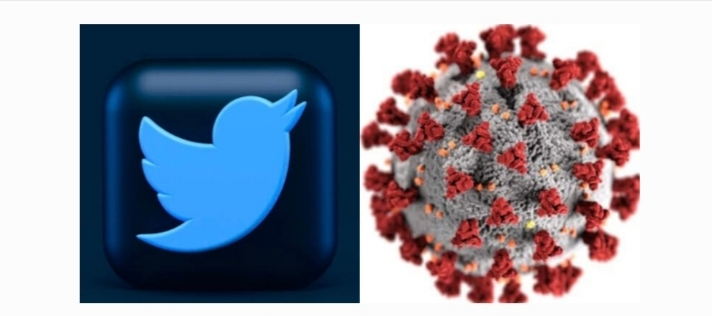

# **Project Summary -**

Write the summary here within 500-600 words.

The COVID-19 pandemic greatly disrupted society, leading to lockdowns that confined people to their homes and negatively affecting various aspects of life.

Our analysis aimed to understand people's feelings by examining their tweets on Twitter. Twitter is a significant platform for sharing thoughts and opinions on social media.

**APPROACH:**

1.Getting the dataset

2.Importing libraries

3.Importing datasets

4.Finding Missing Data

5.Text Preprocessing

6.Exploratory Data Analysis

7.Feature Engineering & Pre-Preprocessing

8.Model Training

**ALGORITHMS USED:**

1.Logistic Regression with Grid Search CV

2.Decision Tree Classifier(Count Vector and TF ID Vectorization techniques).

3.KNN(Count Vector and TF ID Vectorization techniques).

4.SVM Classifier (Count Vector and TF ID Vectorization techniques).

5.Multinomial Navies Bayes & Bernoulli Navies Bayes(Count Vector and TF ID Vectorization techniques).

6.Stochastic Gradient Descent(Count Vector and TF ID Vectorization techniques).

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/MansiKaushik123/classification_project

# **Problem Statement**


**Write Problem Statement Here.**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done then.The names and usernames have been given codes to avoid any privacy concerns.

**Data Description:**

UserName

ScreenName

Location

TweetAt

OriginalTweet

Sentiment-Target variable

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
database = "/content/Coronavirus Tweets (2).csv"
tweet =pd.read_csv(database)

### Dataset First View

In [ ]:
# Dataset First Look
tweet.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
tweet.shape

In [ ]:
tweet.columns

In [ ]:
tweet.index

### Dataset Information

In [ ]:
# Dataset Info
tweet.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
tweet.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
tweet.isna().sum()

In [ ]:
# Visualizing the missing values
tweet.isnull().sum().sort_values(ascending=False)

### **What did you know about your dataset?**

**Answer Here**

In your dataset, there are six columns with information. These columns are 'Location', 'UserName', 'ScreenName', 'TweetAt', 'OriginalTweet', and 'Sentiment'.

Location' column have duplicated value i.e 8590.This could be important for your Classification Machine Learning Project later on. You might want to consider how to handle this duplicate when you work on your project.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
tweet.columns

In [ ]:
# Dataset Describe
tweet.describe(include='all')

### **Variables Description**

**Answer Here**

**UserName:** The name of the person who post the tweet.

**ScreenName:** The unique name or handle that the person uses on Twitter.

**Location:**Where the person is from, like their city, state, or country.

**TweetAt:**  The date and time when the tweet was posted.

**OriginalTweet:** The actual text of the tweet that was written.

**Sentiment:**The emotional tone of the tweet, like if it's positive, negative, really positive, really negative, or neutral. This is determined by a program that analyzes the words used in the tweet.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(tweet.apply(lambda col: col.unique()))

In [ ]:
tweet.Sentiment.unique()

In [ ]:
tweet.Location.unique()

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#Count the number of occurrences of each sentiment appears in the 'Sentiment' column of the 'tweet' DataFrame and then reset."
sentiment_count = tweet['Sentiment'].value_counts().reset_index()
#Change the names of the columns in the resulting DataFrame to 'Sentiment' and 'count', respectively.
sentiment_count.columns = ['Sentiment','count']
sentiment_count

In [ ]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)


In [ ]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
tweet = tweet.replace(replace_values)

In [ ]:
sentiment_count1 = tweet['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1


##### **1. Why did you pick the specific chart?**

**Answer Here.**

A bar graph has the ability to efficiently display the count of tweets for every sentiment classification in a clear and concise way.. Each sentiment classification can be symbolized by a bar, with the vertical extent of the bar signifying the number of tweets for that particular sentiment classification.

#####**2. What is/are the insight(s) found from the chart?**

**Answer Here**

Positive Sentiment is high as compared to the Negative, Neutral Sentiment.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
#Creating a pie chart to show how different sentiments are spread out.
sentiment_count1 = tweet['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

Pie charts are handy when you need to display how big different groups are compared to each other. They help you compare groups easily and quickly. Here, we're using pie charts to show the different types of feelings in tweets: happy, sad, and neutral. The whole set of tweets is like the whole pie, and the feelings are like slices of the pie.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Positive Sentiment is in High Proportion as 43.85% as compared to negative and netural i.e 18.74% and 37.41%.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#Top 10 most frequently occurring locations from the 'Location' column of the tweet DataFrame.
Top_Location_Of_tweet= tweet['Location'].value_counts().head(10)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')


In [ ]:
Top_Location_Of_tweet


In [ ]:
Top_Location_Of_tweet=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet.reset_index(inplace=True)
Top_Location_Of_tweet.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet

In [ ]:
# plot a bar graph using the Seaborn library.
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet,
                 palette="husl")
#Set the title of the plot, label for the y-axis, and label for the x-axis.
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
# Rotate x-axis labels by 45 degrees to make them easier to read
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


##### **1. Why did you pick the specific chart?**

**Answer Here.**

To  visulaize this information, a bar graph is a great option. A bar graph can easily display how many tweets come from each place in a straightforward manner. Each place is shown as a bar, and the bar's height tells you how many tweets are from that place.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The city of London has more tweets than any other city.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#Finds out how many characters are in each tweet and saves this information in the text_length column.
tweet['text_length'] = tweet['OriginalTweet'].apply(len)

In [ ]:
tweet_character_length=tweet['text_length'].sort_values(ascending=False)


In [ ]:
#Make a table called "top_tweet_character_length" using the information in the table named "tweet_character_length"
top_tweet_character_length=pd.DataFrame(tweet_character_length)
# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_tweet_character_length.reset_index(inplace=True)
#Change the names of the columns in the 'top_tweet_character_length' to 'Original_Tweet_Row' and 'tweet_character_Count'.
top_tweet_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)


In [ ]:

top_tweet_character_length

In [ ]:
# Select the top 10 tweets with the longest character lengths, sort them in descending order, and assign them to `top_tweet_length`
top_tweet_length=top_tweet_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)
plt.figure(figsize=(12, 8))
# Create a bar plot using Seaborn, with 'Original_Tweet_Row' on the x-axis, 'tweet_character_Count' on the y-axis, and `top_tweet_length` as the data source
bar_plot = sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_tweet_length, palette='viridis')

##### **1. Why did you pick the specific chart?**

**Answer Here.**

To visualize this data, a bar chart is a good choice. A bar chart can effectively show the Original_Tweet_Row from each location in a clear and concise way. Each location can be represented by a bar, with the height of the bar indicating the tweet_character_Count.



##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Row Number 25160 has highest Tweet length of character i.e 350



#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Count the number of tweets for each different date in the 'TweetAt' column of the 'tweet' dataset, and show the 15 dates with the highest tweet counts.
tweet['TweetAt'].value_counts()

In [ ]:
# Count the number of tweets for each unique date in the 'TweetAt' column of `tweet` and display the 15 most frequent dates
tweet['TweetAt'].value_counts().head(15)

In [ ]:
import pandas as pd
import plotly.express as px
# Create a bar graph for the original tweet column.
tweet['TweetAt'].value_counts().head(15).plot(kind='bar',color='green')

# set the plot title and axis labels
plt.title('Count of Original Tweets by Date')
plt.xlabel('Tweet Date')
plt.ylabel('Count')

# display the plot
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

A bar graph is a popular way to show information about different categories, like dates or types, by using bars to represent how many times each category appears.

#####**2. What is/are the insight(s) found from the chart?**

**Answer Here**

On March 20, 2020, there were the most tweets ever, totaling 3448.


## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
tweet.isnull().sum().sort_values(ascending=False)

#### **What all missing value imputation techniques have you used and why did you use those techniques?**

**Answer Here.**

here we can see we have null values in 'Location'(8590) columnso we are not taking location column for machine learning model as sentiment analysis


### **2. Handling Outliers**


In [ ]:
# Handling Outliers & Outlier treatments
print(tweet[['OriginalTweet', 'Sentiment']].info())

##### **What all outlier treatment techniques have you used and why did you use those techniques**?

**Answer Here.**

We do not treated/handled the outliers because we didn't choose any columns with continuous numbers (numerical data) as the main columns for training the model.

### 5. **Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [ ]:
import regex as re


In [ ]:
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)



In [ ]:
#Text normalization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### **Which text normalization technique have you used and why?**

**Answer Here.**

Here we use only Lemmatization normalization technique because Lemmatization is a technique used for text normalization that reduces words to their base or dictionary form, known as a lemma .Hence ,we used Lemmatization technique as proper text form and later used for classfication modelling .

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today https/20.89.")


In [ ]:
# Apply the `transform_text()` function to each value in the 'OriginalTweet' column of `tweet`
tweet["Clean_Tweets"] = tweet['OriginalTweet'].apply(transform_text)


In [ ]:
# Access the 'OriginalTweet' value in the row with integer in `tweet`
tweet.iloc[25160]["OriginalTweet"]

In [ ]:
tweet.head()

In [ ]:
#Add a new column  to the tweet table named 'temp_list'.
tweet['temp_list'] = tweet['Clean_Tweets'].apply(lambda x:str(x).split())

In [ ]:
tweet['temp_list']

In [ ]:
from collections import Counter
import pandas as pd

# Create a flattened list of all words in the nested list column
word_list = [word for sublist in tweet['temp_list'] for word in sublist]

# Count the frequency of each word and store in a Counter object
word_counts = Counter(word_list)

# Create a dataframe of the top 30 most common words
top_words = pd.DataFrame(word_counts.most_common(30), columns=['Common_words', 'count'])

# Apply a background gradient to the dataframe for better visualization
styled_top_words = top_words.style.background_gradient(cmap='Reds')

In [ ]:
top_words

In [ ]:
#Create a new DataFrame  named neutral that includes only the 'Clean_Tweets' column from the tweet DataFrame where the 'Sentiment' column shows 'Neutral', 'Positive', or 'Negative'.
neutral=pd.DataFrame(tweet[['Clean_Tweets']] [tweet['Sentiment'] == 'Neutral'])
positive=pd.DataFrame(tweet[['Clean_Tweets']] [tweet['Sentiment'] == 'Positive'])
negative=pd.DataFrame(tweet[['Clean_Tweets']] [tweet['Sentiment'] == 'Negative'])

In [ ]:
positive

In [ ]:
negative


In [ ]:
neutral

In [ ]:
pip install wordcloud

In [ ]:
# Create an empty list named spam_corpus.
spam_corpus = []
# Iterate over every row in a DataFrame named tweet where the column 'Sentiment' contains the word 'Neutral'.
for msg in tweet[tweet['Sentiment'] =='Neutral']['Clean_Tweets'].tolist():
  # Split the 'Clean_Tweets' value into individual words using the `split()` method
    for word in msg.split():
       # Append each word to the `spam_corpus` list
        spam_corpus.append(word)

In [ ]:
top_words

In [ ]:
# Import the `Counter` class from the `collections` module
from collections import Counter
plt.figure(figsize=(20,10))
# Import the `seaborn` library for creating data visualizations
sns.barplot(x='Common_words',y='count',data=top_words)
# Set the x-axis labels to be vertical
plt.xticks(rotation='vertical')
# Show the plot
plt.show()


In [ ]:
# Import the `WordCloud` class from the `wordcloud` module
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
#Create a picture made of words using the WordCloud tool and the text information from the 'Clean_Tweets' section of a DataFrame named neutral.
tweet_wc = wc.generate(str(neutral['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)


In [ ]:
# Create a picture of words using the WordCloud tool and the text information from the 'Clean_Tweets' section of a DataFrame named positive.
tweet_wc = wc.generate(str(positive['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)


In [ ]:
# Create a word picture using the WordCloud tool and the text info from the 'Clean_Tweets' section of a table named negative.
tweet_wc = wc.generate(str(negative['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

### **6. Feature Manipulation & Selection**



###**Data Splitting**

In [ ]:
#Assigning dependent and independent features
X= tweet['Clean_Tweets']
y=tweet['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)


##### **What data splitting ratio have you used and why?**

---



**Answer Here.**

 Data Splitting  the data into two parts: 80% for training and 20% for testing. Giving more data for training helps the model learn more about patterns and trends in the data. This makes the model better at making predictions on new data it hasn't seen before.

In [ ]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

# **7. Data Scaling**

**Which method have you used to scale you data and why?**

**Answer Here.**

Here no need of any scaling of Dataset  here since we're just examining how people feel. So, we're only studying user emotions in tweets related to the Covid-19 situation.

### **9. Handling Imbalanced Dataset**

In [ ]:
tweet.info()

##### **Do you think the dataset is imbalanced? Explain Why.**

**Answer Here.**

No, we made a choice to use only two sections for creating machine learning models. These sections are named 'Original Tweet' and 'Sentiment.' And in both of these sections, there's the same number of rows.

Answer Here.

## ***7. ML Model Implementation***

# **Count Vectorization (Bag of words)**

"Count vectorization changes text into numbers for machines to understand. First, the text is broken into words or parts, and then each part's count is used to make a number list showing how often each word appears."

**# Vectorizing Text**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Bag of words
bw=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
bw_X_train=bw.fit_transform(X_train.astype(str).str.strip())

In [ ]:
# Get the shape of the NumPy array bw_X_train
bw_X_train.shape

In [ ]:
# Use the prepared CountVectorizer 'bw' to change the test data 'X_test' into a bag-of-words style.
# The text data in 'X_test' is first converted to a string representation & then stripped of leading & trailing whitespace characters
bw_X_test=bw.transform(X_test.astype(str).str.strip())

In [ ]:
# Get the shape of the NumPy array bw_X_test
bw_X_test.shape


# **MODEL -1 WITH BAGS OF WORDS**

**ML Model - 1**

# **Logistic regression**

"Logistic Regression is a type of math tool that helps us predict if something will happen or not. It works by looking at the chances of an event occurring, which are always between 0 and 1. It's also used for predicting multiple categories for an event based on different things we measure."

In [ ]:
# Initializing the logistic regression model
lr_cv = LogisticRegression()

# Defining a dictionary of hyperparameters to tune over
parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty to apply (L1 or L2)
    'C': [100, 10, 1.0, 0.1, 0.01]  # Inverse of regularization strength (lower values indicate stronger regularization)
}

# Creating a GridSearchCV object with cross-validation of 15
logreg_Gcv = GridSearchCV(lr_cv, parameters, cv=15)

# Fitting the training data to the GridSearchCV object to find the best hyperparameters
logreg_Gcv.fit(bw_X_train, y_train)


In [ ]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(bw_X_test)

In [ ]:
pred_lr_cv

In [ ]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

In [ ]:
#Creating Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

"In this case, the method used was Logistic Regression. It achieved an accuracy of 79% and showed improved scores for various evaluation measures like precision, recall, and F1 score across the 'Negative', 'Neutral', and 'Positive' labels."

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

GridSearchCV helps adjust two settings (hyperparameters) for the logistic regression model. These are the type of regularization (L1 or L2) and how strong the regularization should be (C value). To see how well the model works, it's tested using cross-validation with a 'cv' value of 15.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-79%

precision:-77%

recall:- 77%

f1-score:- 77%

# **Decision Tree Classifier with CV**

A Decision tree is a flowchart-like structure where each internal node represents a test on an attribute (i.e., a feature),each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value (in the case of regression).

In [ ]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(bw_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(bw_X_test)

In [ ]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,bw_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

In [ ]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

In this case, the method used a Decision Tree to make decisions. It was correct about 70% of the time. Also, various ways of measuring how well it did, like precision, recall, and F1 score, got better. These measurements were for different categories called 'Negative,' 'Neutral,' and 'Positive.'

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

GridSearchCV helps adjust two settings (hyperparameters) for the logistic regression model. These are the type of regularization (L1 or L2) and how strong the regularization should be (C value). To see how well the model works, it's tested using cross-validation with a 'cv' value of 15.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-79%

precision:-77%

recall:- 77%

f1-score:- 77%

# **Navie Bayes**

Naive Bayes is a type of computer program used to solve problems where things need to be sorted into different categories. It's especially good for guessing categories when given some clues.


This program works by thinking about how likely something is to be true based on the clues it sees. If it finds more clues that point to one possibility, it guesses that possibility is more likely.

When using this program, it assumes that the clues it looks at don't really affect each other. In other words, it assumes that the presence or absence of one clue doesn't change the chance of another clue being true.

In [ ]:
#Import Library GaussianNB,MultinomialNB,BernoulliNB and score metrics like accuracy ,confusion etc.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [ ]:
# Apply both  type of navies one by one
mnb = MultinomialNB()
bnb = BernoulliNB()

# **Multinomial Navie Bayes**


-Multinomial Naive Bayes: Utilized for categorical information where the characteristics denote tallies or instances of events (e.g., text data).

In [ ]:
#Train a Multinomial Naive Bayes classifier called 'mnb' using the bag-of-words version of the training data 'bw_X_train' along with the matching labels 'y_train'.
mnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred2 = mnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred2' with respect to the true labels 'y_test'
accuracy_mnb = accuracy_score(y_test,y_pred2)
# Print the accuracy of the Multinomial Naive Bayes classifier
print(accuracy_mnb)

In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2))

In [ ]:
cf3= (confusion_matrix(y_test,y_pred2))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Mutinomial Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#1.**Explain the ML Model used and it's performance using Evaluation metric Score Chart**.


**Answer Here.**

In the given program, the method of Multinominal Navies Bayes was used to sort out the information. This led to a correctness rate of 68%. Also, various measures to judge the performance, like precision, recall, and f1 score, were computed for each category ('Negative', 'Neutral', 'Positive'). These measures demonstrated better results when compared to the initial model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-68%

Precision:-68%

Recall:- 69%

f1-score:- 68%

# **Bernoulli Navies Bayes**

Bernoulli Naive Bayes: a variant of Multinomial Naive Bayes used for binary or multiclass data where the features represent the presence or absence of a particular attribute (e.g., a word in a document).

In [ ]:
#Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation
bnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred3 = bnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred3' with respect to the true labels 'y_test'
accuracy_bnb = accuracy_score(y_test,y_pred3)
# Print the accuracy of the bernoulli Naive Bayes classifier
print(accuracy_bnb)

In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3))

In [ ]:
cf4= (confusion_matrix(y_test,y_pred3))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here**

In the given program, the Bernoulli Naive Bayes method was employed to categorize the information, achieving a correctness rate of 69%. Furthermore, various measures for assessment, like precision, recall, and f1 score, were computed for every category ('Negative', 'Neutral', 'Positive') and indicated enhancement compared to the initial model.

**2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-69%

Precision:-68%

Recall:- 70%

f1-score:- 68%

# **KNN(K-Nearest Neighbours)**

"It's a basic method that finds the K most similar examples from the training data to a given input and then predicts the label of the input based on what most of those examples have.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid with range of values for n_neighbors
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,9]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit KNN model to training data and perform grid search
grid_search.fit(bw_X_train, y_train)

# Print best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Mean cross-validation score:', grid_search.best_score_)

In [ ]:
#predicted values
pred_knn_cv = grid_search.predict(bw_X_test)

In [ ]:
pred_knn_cv

In [ ]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

In [ ]:
cf_knn= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_knn, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

The data was sorted using the KNN method, and the accuracy was found to be 39%. Moreover, various measures like precision, recall, and f1 score were computed for each category ('Negative', 'Neutral', 'Positive'). However, these measures did not show any enhancement compared to the initial model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The param_grid dictionary sets the range of choices for n_neighbors. It holds numbers from 1 to 9.
GridSearchCV checks how well the KNN method works for each n_neighbors value. This is done by testing with 5-fold cross-validation.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-38%

Precision:-53%

Recall:-47%

f1-score:- 40%

# **Support Vector Machine**

 "Support Vector Machine (SVM)." SVM is a supervised learning algorithm that seeks to find the hyperplane(s) that best separate classes by maximizing the margin between support vectors.

In [ ]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(bw_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(bw_X_test)

In [ ]:
pred_svm_cv

In [ ]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

In [ ]:
cf6= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-75%

Precision:-77%

Recall:- 77%

f1-score:-77%

**ML Model - 6**

# **Random Forest**

Random Forest operates by creating numerous decision trees using randomly chosen subsets of the training data. Each tree is trained on a distinct subset of the features and the data, which aids in mitigating overfitting and enhancing the model's ability to generalize.

For prediction, the input instance is passed through each decision tree, and the final prediction is determined by aggregating the majority vote from the individual trees' predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_rf = rf_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_rf = (y_pred_rf == y_test).mean()
print('Accuracy_rf:', accuracy_rf)

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf))

In [ ]:
cf7= (confusion_matrix(y_test,y_pred_rf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**



**Answer Here.**

Random Forest algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and not slightly improved compared to the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

Hyperparameter optimization technique has been used for the Random Forest Classifier. The classifier has been instantiated with the hyperparameter values n_estimators=100 and random_state=42, which are default values in the absence of explicit hyperparameter tuning.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

No, as seen in above Evaluation metric Score Chart as follows

Accuracy:-76%

Precision:-75%

Recall:- 75%

f1-score:-75%

**ML Model - 7**

# **Stochastic Gradient Descent**

In Stochastic Gradient Descent (SGD), rather than calculating the gradient over the entire training dataset, the gradient is computed on a randomly chosen subset (or mini-batch) of the training data. This approach reduces the computational burden of the algorithm and allows for quicker convergence.

The model parameters are adjusted after processing each mini-batch, and this process is reiterated until either convergence is achieved or a predefined maximum number of iterations is reached.

SGD is particularly effective for extensive datasets and high-dimensional data since it can efficiently manage substantial data volumes and converge more rapidly than conventional Gradient Descent.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_sgd = sgd_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd= accuracy_score(y_test, y_pred_sgd)
print('Accuracy_sgd:', accuracy_sgd)


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd))

In [ ]:
cf8= (confusion_matrix(y_test,y_pred_sgd))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf8, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (STOCHASTIC GRADIENT DESCENT CLASSIFIER with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Stochastic Gradient Descent algorithm was used to classify the data, resulting in an accuracy of 80%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The classifier has been instantiated with the hyperparameter values loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000, which are default values in the absence of explicit hyperparameter tuning.



**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Stochastic Gradient Descent algorthim used for model deployement as Sentiment Analysis using Vectorization techinque Count Vectorizer(Bags of Word).

Accuracy:-80%

Precision:-81%

Recall:- 80%

f1-score:-80%

# **TF-IDF VECTORIZATION(Term Frequency-Inverse Document Frequency)**

TF-IDF in natural language processing (NLP) is "Term Frequency-Inverse Document Frequency Weighting," which is often abbreviated as TF-IDF weighting or TF-IDF score. This weighting scheme is widely used in information retrieval and text mining to evaluate the importance of terms within a document relative to a collection of documents (corpus).

**Data Splitting**

In [ ]:
X=tweet['Clean_Tweets']
y=tweet['Sentiment']


In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [ ]:
print(X_train.shape)
y_test.shape

# **# Vectorizing Text**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())


In [ ]:
tv_X_train.shape

In [ ]:
tv_X_test=tv.transform(X_test.astype(str).str.strip())

**MODEL - 1 (TF-IDF)**

# **Logistic Regression**

In [ ]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

In [ ]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [ ]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

In [ ]:
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Logistic Regression algorithm was employed to categorize the data, yielding an accuracy of 78%. Furthermore, various assessment metrics, including precision, recall, and f1 score, were computed for each category ('Negative', 'Neutral', 'Positive') and demonstrated significant enhancements compared to all the baseline models.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The hyperparameter space is determined by the "parameters" dictionary, which outlines the values for the regularization parameter C and the penalty term (l1 or l2). GridSearchCV also serves to mitigate overfitting and guarantees that the model exhibits good generalization to unseen data.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Logistic Regression algorthim used for model deployement as Sentiment Analysis using Vectorization techinque TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-78%

Precision:-79%

Recall:- 79%

f1-score:-79%

# **Decision Tree**

In [ ]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [ ]:
pred_dt_tv

In [ ]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

In [ ]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Decision Tree algorithm was used to classify the data, resulting in an accuracy of 62%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

No, as seen in above Evaluation metric Score Chart as follows and here accuracy is not much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-62%

Precision:-60%

Recall:- 60%

f1-score:-60%

# **Navie Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [ ]:
mnb = MultinomialNB()
bnb = BernoulliNB()



In [ ]:
mnb.fit(tv_X_train,y_train)
y_pred2_mnb_tv = mnb.predict(tv_X_test)
accuracy_mnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred2_mnb_tv))

In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2_mnb_tv))

In [ ]:

cf3a= (confusion_matrix(y_test,y_pred2_mnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Multinominal with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Multinomial Navies Bayes was used to classify the data, resulting in an accuracy of 65%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-65%

Precision:-68%

Recall:- 66%

f1-score:-62%

# **Bernoulli Navies Bayes**

In [ ]:
bnb.fit(tv_X_train,y_train)
y_pred3_bnb_tv = bnb.predict(tv_X_test)
accuracy_bnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred3_bnb_tv))

In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3_bnb_tv))

In [ ]:
cf4a= (confusion_matrix(y_test,y_pred3_bnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**



**Answer Here.**

Bernoulli Navies Bayes was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**



**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-69%

Precision:-68%

Recall:- 70%

f1-score:-68%

**MODEL - 4 (TF-IDF)**

# **KNN(K-Nearest Neighbours)**

In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_tv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_tv.fit(tv_X_train, y_train)

In [ ]:
#predicted values
pred_knn_tv = knn_tv.predict(tv_X_test)


In [ ]:
pred_knn_tv

In [ ]:
# Accuracy
accuracy_KNN_tv = accuracy_score(y_test,pred_knn_tv)
print("Accuracy :",(accuracy_KNN_tv))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_tv))

In [ ]:
cf4a= (confusion_matrix(y_test,pred_knn_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

KNN(K-Nearest Neighbours)was used to classify the data, resulting in an accuracy of 27%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and worst model as compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

Hyperparameters using cross-validation, In this case, the hyperparameter space is defined by the "param" dictionary, which specifies the number of neighbors to consider (n_neighbors) ranging from 1 to 8.

The reason for using GridSearchCV in this case is to find the optimal number of neighbors (n_neighbors) for the KNN classifier.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**



**Answer Here.**

No, as seen in above Evaluation metric Score Chart as follows and here accuracy is worst as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-27%

Precision:-62%

Recall:- 40%

f1-score:-25%

**MODEL - 5 (TF-IDF)**

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_rf_tv = rf_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_tv_rf = (y_pred_rf_tv == y_test).mean()
print('Accuracy_tv_rf:', accuracy_tv_rf)

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf_tv))

In [ ]:

cf5a= (confusion_matrix(y_test,y_pred_rf_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**



**Answer Here.**

Random Forest was employed to categorize the data, yielding an accuracy of 73%. Furthermore, various assessment criteria, including precision, recall, and f1 score, were computed for each category ('Negative,' 'Neutral,' 'Positive') and significantly enhanced the model compared to all the baseline models.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The Random Forest Classifier has been initialized with some default values for the hyperparameters, including n_estimators=100 and random_state=42. In this scenario, the model has been fitted to the training data using the default values and used to predict the labels for the test data.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-72%

Precision:-73%

Recall:- 73%

f1-score:-73%

**MODEL - 6 (TF-IDF)**

# **Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_sgd_tv = sgd_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd_tv= accuracy_score(y_test, y_pred_sgd_tv)
print('Accuracy:', accuracy_sgd_tv)


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd_tv ))

In [ ]:
cf6a= (confusion_matrix(y_test,y_pred_sgd_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Stochastics Classifer with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Stochastic Gradient Descent was employed to classify the data, yielding an accuracy of 76%. Furthermore, various evaluation metrics, including precision, recall, and f1 score, were computed for each label ('Negative', 'Neutral', 'Positive') and significantly enhanced the model compared to all the baseline models.





**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The Stochastic Gradient Descent (SGD) Classifier has been initialized with some default values for the hyperparameters, including loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000. In this case, the default values have been used to fit the model to the training data and predict the labels for the test data

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-72%

Precision:-77%

Recall:- 77%

f1-score:-76%

**MODEL - 7 (TF-IDF)**

In [ ]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(tv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(tv_X_test)

In [ ]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))


In [ ]:
cf7a= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Support Vector Machine with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Support Vector Machine was employed to categorize the dataset, yielding an accuracy of 77%. Moreover, various assessment criteria, including precision, recall, and F1 score, were computed for each category ('Negative', 'Neutral', 'Positive'), showcasing substantial enhancement in model performance when contrasted with all the baseline models.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**



**Answer Here. **

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-77%

Precision:-76%

Recall:- 73%

f1-score:-74%

# **Classfication Metrics Report**

Classification metrics are used to evaluate the performance of a classification model by comparing the predicted labels to the actual labels. Accuracy can be useful in evaluating sentiment analysis models, particularly if the classes are balanced.

Accuracy: The proportion of correctly predicted labels out of the total number of samples. It is computed as (TP+TN)/(TP+TN+FP+FN)

Where

TP:-True Positive

TN:-True Negative

FP:-False Positive

FN:-False Negative

In [ ]:
acurracy = {'Model':  ['Logistic Regression with GridserachCV', 'Decision Tree Classifier','K-Nearest-Neighbours Classifier','Support-Vector-Machine Classifier','Multinomial Navies Bayes','Bernoulli Navies Bayes','Stochastic Gradient Descent','Random Forest'],
        'Count Vector':  [accuracy_lr_cv,np.mean(cv_score_dt_cv),accuracy_KNN,accuracy_svc,accuracy_bnb,accuracy_mnb,accuracy_sgd,accuracy_rf],
        'Tf/idf Vector': [accuracy_lr_Gcv,np.mean(cv_score_dt_tv),accuracy_KNN_tv,accuracy_svc,accuracy_mnb_tv,accuracy_bnb_tv,accuracy_sgd_tv,accuracy_tv_rf]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])
cv_score_table

**1. Which ML model did you choose from the above created models as your final prediction model and why?**



**Answer Here.**

Based on the metrics chart above, we can infer that the Stochastic Gradient Descent model utilizing Count Vectorization Technique outperformed the Logistic Regression model using Tf/idf Vectorization, achieving an accuracy level of 80% compared to the latter's accuracy of 78%. Consequently, we have opted to implement the Stochastic Gradient Descent model with Count Vectorization Technique for deployment.

**2.Explain the model which you have used and the feature importance using any model explainability tool?**

**Answer Here.**

1-The model that we have used is the Stochastic Gradient Descent (SGD) classifier, which is a linear classifier that uses gradient descent optimization to update the model parameters. The Count Vectorization Technique works by counting the occurrence of each word in the text data and then creating a document-term matrix where each row represents a document and each column represents a word in the vocabulary.

2-To understand the feature importance, we can use the Permutation Importance technique provided by the scikit-learn library. The Permutation Importance technique works by randomly permuting the values of a feature and observing the effect on the model's performance.

**Conclusion**


1.We applied 7 models namely, Logistic Regression , Decision Tree Classifier with CV,Navie Bayes ,Multinomial Navies Bayes,Bernoulli Navies Bayes,KNN(K-Nearest Neighbours),Stochastic Gradient Descent,Support Vector Machine






2.We can deduce that the machine is producing the most optimal outcomes for the Stochastic Gradient Descent (using count vectorization) model, achieving an accuracy of 80.43%. This is closely followed by the Logistic Regression with Grid Search CV (employing TF/IDF vectorization) model, which attains an accuracy of 78.86%.




3.In times to come, we will be able to redo the examination and juxtapose it with the current emotional assessment to measure the effects of the actions in practice.